In [0]:
!pip install patool

In [0]:
from keras.applications import VGG16
from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.preprocessing import image
from keras.layers import Dense,Flatten,Dropout

import patoolib
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
patoolib.extract_archive("cat_dog_small.rar",outdir=".")

patool: Extracting cat_dog_small.rar ...
patool: running /usr/bin/unrar x -- /content/cat_dog_small.rar
patool:     with cwd='.'
patool: ... cat_dog_small.rar extracted to `.'.


'.'

In [0]:
base_dir = "cat_dog_small"
train_dir = os.path.join(base_dir,"train")
validation_dir = os.path.join(base_dir,"validation")
test_dir = os.path.join(base_dir,"test")

In [8]:
conv_base = VGG16(weights="imagenet",include_top=False,input_shape=(150,150,3))

Instructions for updating:
Colocations handled automatically by placer.
58892288/58889256 [==============================] - 4s 0us/step


# step1: Freezing the convolutional base of the pretrained model

In [0]:
conv_base.trainable = False

# step2: adding a fully-connected classifier on top of the convolutional base

In [0]:
model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation="relu"))
#model.add(Dropout(0.3))
model.add(Dense(1,activation="sigmoid"))

In [0]:
model.compile(loss="binary_crossentropy",optimizer=RMSprop(lr=2e-5),metrics=["accuracy"])

In [0]:
train_datagen = image.image.ImageDataGenerator(rescale=1./255,rotation_range=40,width_shift_range=0.2,
                                               height_shift_range=0.2,zoom_range=0.2,shear_range=0.2,
                                               horizontal_flip=True,fill_mode="nearest")
test_datagen = image.ImageDataGenerator(rescale=1./255)

In [25]:
train_generator = train_datagen.flow_from_directory(train_dir,target_size=(150,150),batch_size=20,class_mode="binary")
validation_generator = test_datagen.flow_from_directory(validation_dir,target_size=(150,150),batch_size=20,
                                                        class_mode="binary")

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [70]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_9 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_17 (Dense)             (None, 256)               2097408   
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 257       
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


# step3: running the network with the added part

In [71]:
history=model.fit_generator(train_generator,epochs=30,steps_per_epoch=100,validation_data=validation_generator,
                            validation_steps=50)

Epoch 1/30
 60/100 [=================>............] - ETA: 7s - loss: 0.6116 - acc: 0.6825

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 80000 bytes but only got 0. Skipping tag 64640
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 6553600 bytes but only got 0. Skipping tag 49
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1050744 bytes but only got 4951. Skipping tag 51
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 293339136 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expect

 99/100 [============================>.] - ETA: 0s - loss: 0.5831 - acc: 0.7056

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 404094976 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 404619264 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 425459712 bytes but only got 0. Skipping tag 4
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1385474 bytes but only got 6833. Skipping tag 513
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expe

100/100 [==============================] - 21s 214ms/step - loss: 0.5814 - acc: 0.7075 - val_loss: 0.4344 - val_acc: 0.8130
Epoch 2/30
100/100 [==============================] - 19s 191ms/step - loss: 0.4821 - acc: 0.7855 - val_loss: 0.3720 - val_acc: 0.8550
Epoch 3/30
100/100 [==============================] - 19s 186ms/step - loss: 0.4402 - acc: 0.8050 - val_loss: 0.3229 - val_acc: 0.8720
Epoch 4/30
100/100 [==============================] - 19s 186ms/step - loss: 0.4078 - acc: 0.8255 - val_loss: 0.3144 - val_acc: 0.8640
Epoch 5/30
100/100 [==============================] - 19s 185ms/step - loss: 0.3898 - acc: 0.8355 - val_loss: 0.2931 - val_acc: 0.8730
Epoch 6/30
100/100 [==============================] - 19s 193ms/step - loss: 0.3712 - acc: 0.8420 - val_loss: 0.2876 - val_acc: 0.8740
Epoch 7/30
100/100 [==============================] - 18s 184ms/step - loss: 0.3672 - acc: 0.8420 - val_loss: 0.2614 - val_acc: 0.8940
Epoch 8/30
100/100 [==============================] - 18s 184ms/st

# step4: Unfreezing the few top layers of the conv base

In [0]:
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
  if layer.name == "block5_conv1":
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

In [81]:
model.compile(loss="binary_crossentropy",optimizer=RMSprop(lr=1e-5),metrics=["accuracy"])
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

# step5: Training the again the network(it's needed to recompile the network after unfreezing some top layers, otherwise the changes will be ignored)

In [82]:
history=model.fit_generator(train_generator,epochs=30,steps_per_epoch=100,validation_data=validation_generator,
                            validation_steps=50)

Epoch 1/30
 18/100 [====>.........................] - ETA: 19s - loss: 0.2814 - acc: 0.8722

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 80000 bytes but only got 0. Skipping tag 64640
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 6553600 bytes but only got 0. Skipping tag 49
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1050744 bytes but only got 4951. Skipping tag 51
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 293339136 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expect

 99/100 [============================>.] - ETA: 0s - loss: 0.2886 - acc: 0.8758

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 404094976 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 404619264 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 425459712 bytes but only got 0. Skipping tag 4
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1385474 bytes but only got 6833. Skipping tag 513
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expe

100/100 [==============================] - 22s 219ms/step - loss: 0.2868 - acc: 0.8765 - val_loss: 0.2282 - val_acc: 0.9090
Epoch 2/30
100/100 [==============================] - 19s 191ms/step - loss: 0.2541 - acc: 0.8955 - val_loss: 0.2101 - val_acc: 0.9150
Epoch 3/30
100/100 [==============================] - 20s 199ms/step - loss: 0.2386 - acc: 0.9015 - val_loss: 0.1945 - val_acc: 0.9250
Epoch 4/30
100/100 [==============================] - 19s 190ms/step - loss: 0.2272 - acc: 0.9030 - val_loss: 0.1740 - val_acc: 0.9280
Epoch 5/30
100/100 [==============================] - 19s 188ms/step - loss: 0.2064 - acc: 0.9115 - val_loss: 0.1927 - val_acc: 0.9160
Epoch 6/30
100/100 [==============================] - 19s 188ms/step - loss: 0.1912 - acc: 0.9200 - val_loss: 0.1529 - val_acc: 0.9360
Epoch 7/30
100/100 [==============================] - 20s 200ms/step - loss: 0.1815 - acc: 0.9335 - val_loss: 0.1893 - val_acc: 0.9310
Epoch 8/30
100/100 [==============================] - 19s 188ms/st

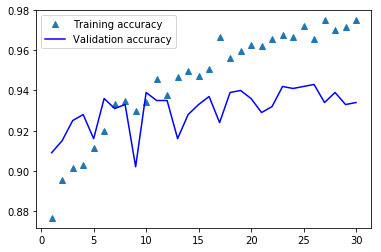

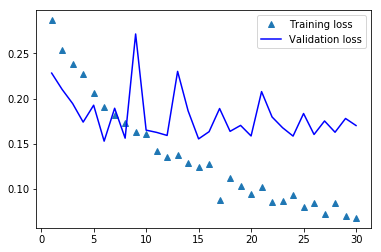

In [93]:
hist = history.history
acc = hist["acc"]
loss = hist["loss"]
val_acc = hist["val_acc"]
val_loss = hist["val_loss"]
epochs = range(1,len(acc)+1)
plt.plot(epochs,acc,"^",label="Training accuracy")
plt.plot(epochs,val_acc,"b",label="Validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs,loss,"^",label="Training loss")
plt.plot(epochs,val_loss,"b",label="Validation loss")
plt.legend()

In [94]:
test_generator = test_datagen.flow_from_directory(test_dir,target_size=(150,150),class_mode="binary",batch_size=20)
test_loss, test_acc = model.evaluate_generator(test_generator,steps=50)
print("Accuracy: ",test_acc)

Found 1000 images belonging to 2 classes.
Accuracy:  0.9399999928474426
